In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>List of companies - 801.6k companies | AmbitionBox</title><meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/><meta content="1 day" data-n-head="ssr" name="revisit-after"/><meta content="AmbitionBox" data-n-head="ssr" name="application-name"/><meta content="EN" data-n-head="ssr" name="content-language"/><meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/><meta content="712617688793459" data-n-head="ssr" property="fb:app_id"/><meta content="#ffffff" data-n-head="ssr" name="theme-color"/><meta content="#ffffff" data-n-head="ssr" name="msapplication-navbutton-color"/><meta content="default" data-n-head="ss
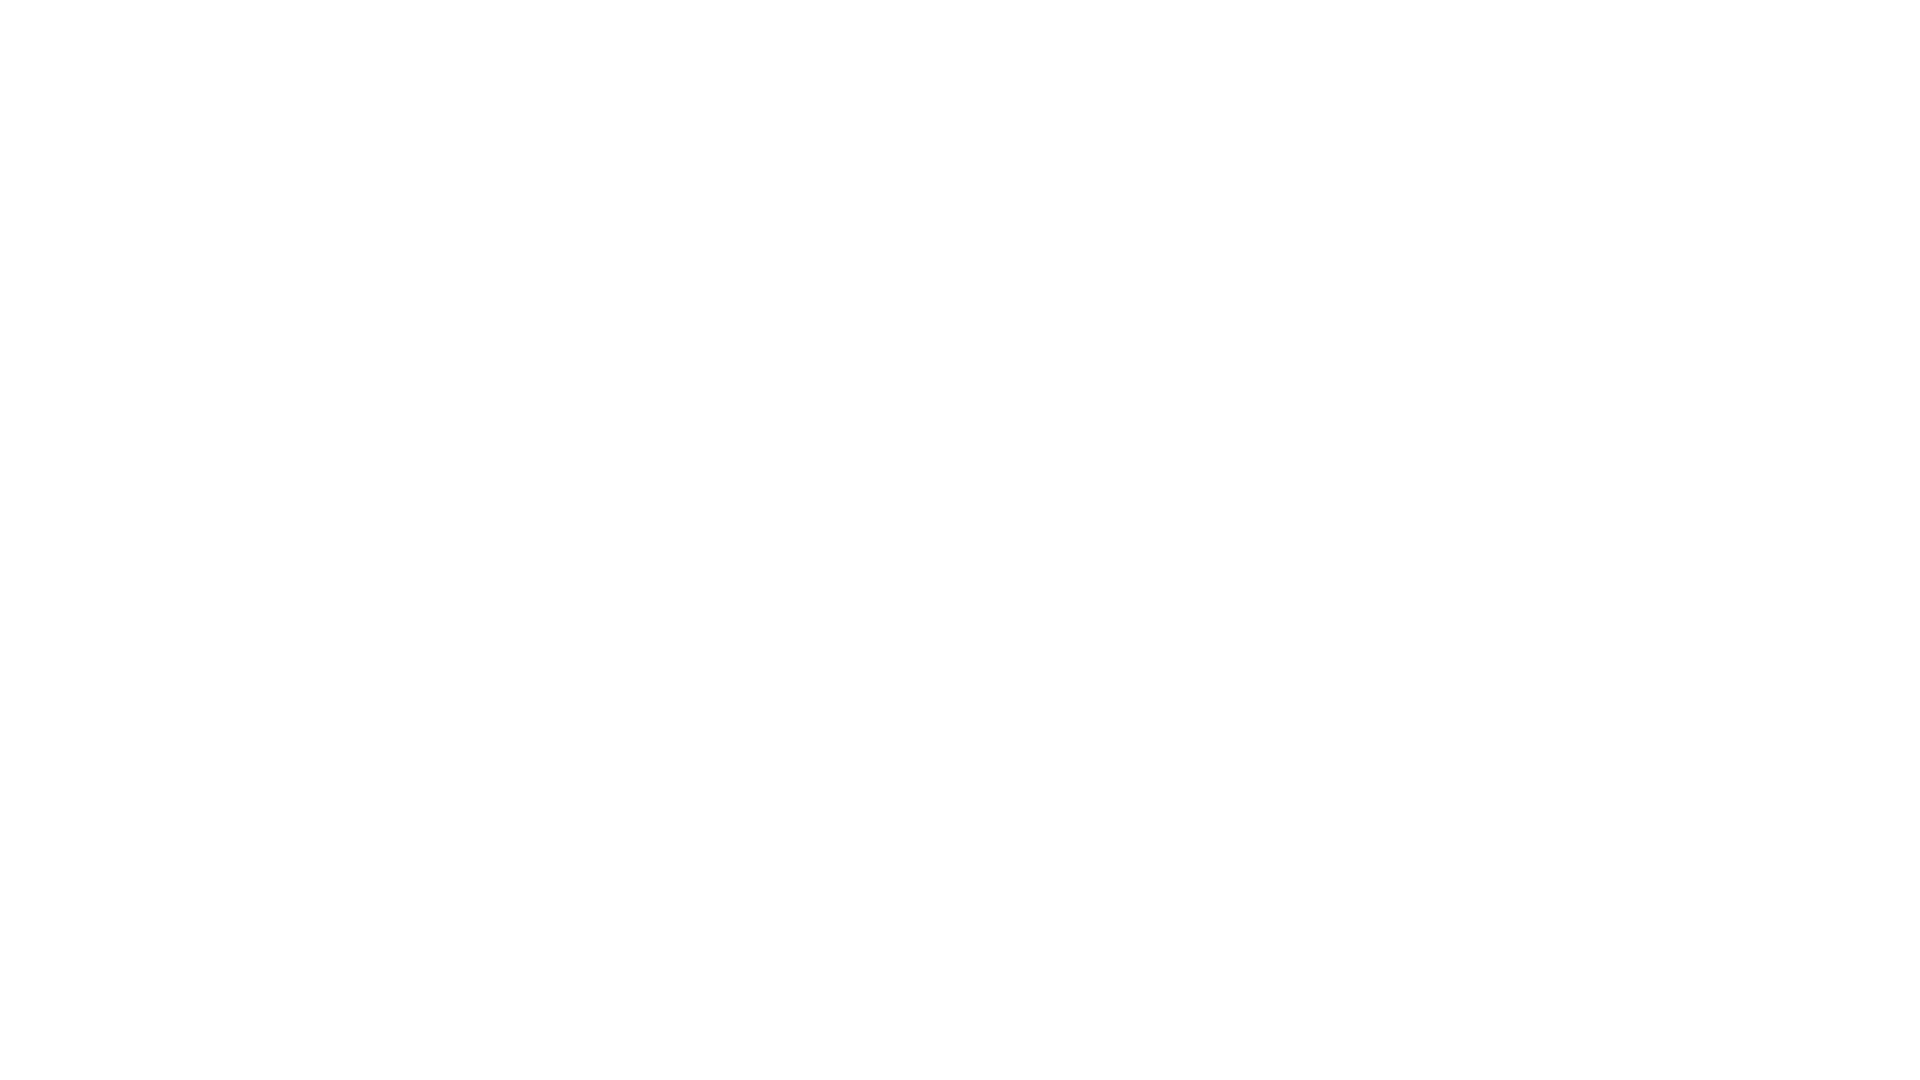

In [4]:
url="https://www.ambitionbox.com/list-of-companies?page=1"
headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

page=requests.get(url,headers=headers)
soup=BeautifulSoup(page.content, "lxml")
soup

In [36]:
companies=soup.find_all(class_="ab-company-result-card")
companies

[<div class="ab-company-result-card" itemprop="itemListElement" itemscope="itemscope" itemtype="http://schema.org/ListItem"><meta content="1" itemprop="position"/> <meta content="TCS" itemprop="name"/> <meta content="Tata Consultancy Services" itemprop="alternateName"/> <meta content="https://www.ambitionbox.com/overview/tcs-overview" itemprop="url"/> <meta content="https://static.ambitionbox.com/alpha/company/photos/logos/tcs.jpg" itemprop="image"/> <div class="company-content-wrapper"><div class="company-content"><div class="company-logo"><img alt="Tata Consultancy Services logo" class="lazy" data-src="https://static.ambitionbox.com/assets/v2/images/rs:fit:200:200:false:false/bG9jYWw6Ly8vbG9nb3Mvb3JpZ2luYWxzL3Rjcy5qcGc.webp" height="100" onerror="this.onerror=null;this.src='/static/icons/company-placeholder.svg';" src="https://static.ambitionbox.com/static/icons/company-placeholder.svg" width="100"/></div> <div class="company-info-wrapper"><div class="company-info"><div class="left">

In [6]:
len(companies)

30

In [37]:
first=companies[0]
first

<div class="ab-company-result-card" itemprop="itemListElement" itemscope="itemscope" itemtype="http://schema.org/ListItem"><meta content="1" itemprop="position"/> <meta content="TCS" itemprop="name"/> <meta content="Tata Consultancy Services" itemprop="alternateName"/> <meta content="https://www.ambitionbox.com/overview/tcs-overview" itemprop="url"/> <meta content="https://static.ambitionbox.com/alpha/company/photos/logos/tcs.jpg" itemprop="image"/> <div class="company-content-wrapper"><div class="company-content"><div class="company-logo"><img alt="Tata Consultancy Services logo" class="lazy" data-src="https://static.ambitionbox.com/assets/v2/images/rs:fit:200:200:false:false/bG9jYWw6Ly8vbG9nb3Mvb3JpZ2luYWxzL3Rjcy5qcGc.webp" height="100" onerror="this.onerror=null;this.src='/static/icons/company-placeholder.svg';" src="https://static.ambitionbox.com/static/icons/company-placeholder.svg" width="100"/></div> <div class="company-info-wrapper"><div class="company-info"><div class="left"><

In [38]:
name=first.find(class_="company-name bold-title-l").get_text().strip()
name

'TCS'

In [39]:
rate=first.find(class_="rating-wrapper").get_text().strip().split()[0]
rate

'3.9'

In [40]:
rev=first.find(class_="rating-wrapper").get_text().strip().split()[1].strip('(')
rev

'53.5k'

In [41]:
award=first.find(class_="award-leaf").get_text().strip()
award

'#6 Best Mega Company - 2021'

In [42]:
info=[g.get_text().strip() for g in first.find(class_="company-basic-info").find_all('p')]
info

['Public',
 'Mumbai,Maharashtra + 272 more',
 '55 years old',
 '1 Lakh+ Employees (India)']

In [43]:
serv=[t.get_text().strip() for t in first.find(class_="chips-block").find_all('li')]
serv

['BPO',
 'IT Services & Consulting',
 'Forbes Global 2000',
 'Fortune India 500',
 'Public',
 'Mumbai,Maharashtra']

In [44]:
desc=first.find(class_="description").get_text().strip().replace("\n",'')
desc

'We ensure the highest levels of certainty and satisfaction through a deep-set commitment to our clients, comprehensive industry expertise and a global network of innovation and delivery centers.We function as a full stakeholder to business, offering a consulting-led approach with an integrated portfolio of technology led solutions that encompass the entire Enterprise value chain. Our Customer-centric Engagement Model defines how we do engage with you, offering specialized services and solutions that meet the distinct needs of your business.We build bespoke teams around your domain and technology requirements drawn from our talent pool of over 488,649 global professionals including 36.5% women from 154 nationalities. Our domain expertise has been built upon decades of experience working across industries and this knowledge underpins our suite of solutions.Our organization structure is domain led and empowered to help provide Customers a single window to industry specific solutions. Agi

In [49]:
action=[t.get_text().strip().replace('\n','').replace('\t','') for t in first.find(class_="company-action-center").find_all('li')]
action

['About', 'Reviews53.5k', 'Salaries346.9k', 'Interviews4.6k', 'Jobs154']

In [50]:
names, ratings, reviews, awards, info, services, description, action = [],[],[],[],[],[],[],[]
for f in companies:
    if f.find(class_="award-leaf"):
        names.append(f.find(class_="company-name bold-title-l").get_text().strip())
        ratings.append(f.find(class_="rating-wrapper").get_text().strip().split()[0])
        reviews.append(f.find(class_="rating-wrapper").get_text().strip().split()[1].strip('('))
        awards.append(f.find(class_="award-leaf").get_text().strip())
        info.append([g.get_text().strip() for g in f.find(class_="company-basic-info").find_all('p')])
        services.append([t.get_text().strip() for t in f.find(class_="chips-block").find_all('li')])
        description.append(f.find(class_="description").get_text().strip().replace("\n",''))
        action.append([t.get_text().strip().replace('\n','').replace('\t','') for t in f.find(class_="company-action-center").find_all('li')])
    else:
        names.append(f.find(class_="company-name bold-title-l").get_text().strip())
        ratings.append(f.find(class_="rating-wrapper").get_text().strip().split()[0])
        reviews.append(f.find(class_="rating-wrapper").get_text().strip().split()[1].strip('('))
        awards.append(None)
        info.append([g.get_text().strip() for g in f.find(class_="company-basic-info").find_all('p')])
        services.append([t.get_text().strip() for t in f.find(class_="chips-block").find_all('li')])
        description.append(f.find(class_="description").get_text().strip().replace("\n",''))
        action.append([t.get_text().strip().replace('\n','').replace('\t','') for t in f.find(class_="company-action-center").find_all('li')])

In [51]:
len(names), len(ratings), len(reviews), len(awards), len(info), len(services), len(description), len(action)

(30, 30, 30, 30, 30, 30, 30, 30)

### Iterating over 100 pages

In [58]:
names, ratings, reviews, awards, info, services, description, action = [],[],[],[],[],[],[],[]
for i in range(1,101):
    url=f"https://www.ambitionbox.com/list-of-companies?page={i}"
    page=requests.get(url,headers=headers)
    soup=BeautifulSoup(page.content, "lxml")
    companies=soup.find_all(class_="ab-company-result-card")
    for f in companies:
        if f.find(class_="award-leaf"):
            names.append(f.find(class_="company-name bold-title-l").get_text().strip())
            ratings.append(f.find(class_="rating-wrapper").get_text().strip().split()[0])
            reviews.append(f.find(class_="rating-wrapper").get_text().strip().split()[1].strip('('))
            awards.append(f.find(class_="award-leaf").get_text().strip())
            info.append([g.get_text().strip() for g in f.find(class_="company-basic-info").find_all('p')])
            if f.find(class_="chips-block"):
                services.append([t.get_text().strip() for t in f.find(class_="chips-block").find_all('li')])
            else:
                services.append(None)
            if f.find(class_="description"):
                description.append(f.find(class_="description").get_text().strip().replace("\n",''))
            else:
                description.append("Description Not given")
                
            action.append([t.get_text().strip().replace('\n','').replace('\t','') for t in f.find(class_="company-action-center").find_all('li')])
        else:
            names.append(f.find(class_="company-name bold-title-l").get_text().strip())
            ratings.append(f.find(class_="rating-wrapper").get_text().strip().split()[0])
            reviews.append(f.find(class_="rating-wrapper").get_text().strip().split()[1].strip('('))
            awards.append(None)
            info.append([g.get_text().strip() for g in f.find(class_="company-basic-info").find_all('p')])
            if f.find(class_="chips-block"):
                services.append([t.get_text().strip() for t in f.find(class_="chips-block").find_all('li')])
            else:
                services.append(None)
            if f.find(class_="description"):
                description.append(f.find(class_="description").get_text().strip().replace("\n",''))
            else:
                description.append("Description Not given")
                
            action.append([t.get_text().strip().replace('\n','').replace('\t','') for t in f.find(class_="company-action-center").find_all('li')])
            

In [59]:
len(names), len(ratings), len(reviews), len(awards), len(info), len(services), len(description), len(action)

(2999, 2999, 2999, 2999, 2999, 2999, 2999, 2999)

In [60]:
d={"Company Name":names,"Ratings": ratings, "Reviews":reviews,"Awards":awards,"Basic Info":info,'Services':services, "Description":description, "Action":action}
df=pd.DataFrame(d)
df

,Company Name,Ratings,Reviews,Awards,Basic Info,Services,Description,Action
0,TCS,3.9,53.5k,#6 Best Mega Company - 2021,"[Public, Mumbai,Maharashtra + 272 more, 55 yea...","[BPO, IT Services & Consulting, Forbes Global ...",We ensure the highest levels of certainty and ...,"[About, Reviews53.5k, Salaries346.9k, Intervie..."
1,Accenture,4.1,34.6k,#5 Best Mega Company - 2022,"[Public, Dublin + 134 more, 34 years old, 1 La...","[IT Services & Consulting, Software Product, F...",Accenture is a global professional services co...,"[About, Reviews34.6k, Salaries223.1k, Intervie..."
2,Cognizant,3.9,31.7k,#19 Best Mega Company - 2022,"[Private, Teaneck. New Jersey. + 103 more, 29 ...","[IT Services & Consulting, Forbes Global 2000]","At Cognizant, we give organizations the insigh...","[About, Reviews31.7k, Salaries205.3k, Intervie..."
3,ICICI Bank,4.1,25.9k,#12 Best Mega Company - 2022,"[Public, Mumbai,Maharashtra + 1093 more, 29 ye...","[Financial Services, Banking, Forbes Global 20...",ICICI Bank is a leading private sector bank in...,"[About, Reviews25.9k, Salaries80.3k, Interview..."
4,HDFC Bank,4.0,25.1k,#12 Best Mega Company - 2022,"[Public, Mumbai,Maharashtra + 1310 more, 29 ye...","[Financial Services, Banking, Insurance, Forbe...",The Housing Development Finance Corporation Li...,"[About, Reviews25.1k, Salaries84.9k, Interview..."
...,...,...,...,...,...,...,...,...
2994,CBSL,3.6,187,None,"[Private, New Delhi + 43 more, 73 years old, 1...","[Consumer goods, Manufacturing, Printing / Pac...","Established in the year 1950, under the name o...","[About, Reviews187, Salaries1.3k, Interviews11..."
2995,Inventia Healthc...,4.1,187,None,"[Private, Mumbai,Maharashtra + 6 more, 38 year...","[Manufacturing, Pharma, Mumbai,Maharashtra]","Inventia, established in 1985, is a privately ...","[About, Reviews187, Salaries1.5k, Interviews5,..."
2996,Su-Kam Power Sys...,4.4,187,None,"[Private, Gurgaon/Gurugram,Haryana + 40 more, ...","[Manufacturing, Power, Electronics, Gurgaon/Gu...",Su-Kam® is India's leading power solutions com...,"[About, Reviews187, Salaries565, Interviews1, ..."
2997,Azure Power,3.9,187,None,"[Private, Delhi,NCT + 13 more, 15 years old, 5...","[Internet, Power]",Our mission is to be the lowest-cost power pro...,"[About, Reviews187, Salaries1.3k, Interviews14..."


In [61]:
url="https://www.naukri.com/python-developer-jobs-in-pune?k=python%20developer&l=pune&experience=1"
page=requests.get(url,headers=headers)
soup=BeautifulSoup(page.content, "lxml")
soup

<!DOCTYPE html>
<html lang="en"> <head> <meta content="IE=Edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width,initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/> <link href="//static.naukimg.com" rel="dns-prefetch preconnect"/> <link href="//img.naukimg.com" rel="dns-prefetch preconnect"/> <link href="//logs.naukri.com" rel="dns-prefetch preconnect"/> <link href="//lg.naukri.com" rel="dns-prefetch preconnect"/> <link href="https://www.googletagmanager.com" rel="dns-prefetch"/> <base href="//www.naukri.com"/> <link href="./manifest.json" rel="manifest"/> <link as="style" href="//static.naukimg.com/s/7/109/c/main.94577272.min.css" rel="preload"/> <link as="script" crossorigin="anonymous" href="//static.naukimg.com/s/7/109/j/main.842ee925.min.js" rel="preload"/> <link as="script" href="https://static.naukimg.com/s/7/0/j/widget-client-ni.min.js" rel="preload"/> <link as="script" href="https://static.naukimg.com/s/7/0/j/naukri-widg